# Clustering Analysis for HELP International

## This notebook is divided into four sections

### 1. Data Inspection

### 2. EDA

### 3.  Data Preparation and K Means Clustering Analysis

### 4.  Hierarchical Clustering

# Section 1. Data Inspection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', 200)


### Reading CSV file

In [2]:
# Reading csv file
country = pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


### Checking file

In [4]:
country.shape

(167, 10)

In [5]:
#Checking datatypes, null count
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


**`We can see there are 167 rows and 10 columns with non-null values, has 7 - float columns, 2 integer columns , and 1 object`**

### Statistical Description

In [6]:
country.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**`['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',  'gdpp'] columns max value have huge deviation from median, so there are outliers in the dataset. We will explore more in EDA. `**

### Checking Null

In [7]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**`There are no null values in the Dataset`**

### Checking Duplicate

In [8]:
country['country'].nunique()

167

**`There are no duplicates`**

## Column Name	Description
- 0	country	Name of the country
- 1	child_mort	Death of children under 5 years of age per 1000 live births
- 2	exports	Exports of goods and services per capita. Given as %age of the GDP per capita
- 3	health	Total health spending per capita. Given as %age of GDP per capita
- 4	imports	Imports of goods and services per capita. Given as %age of the GDP per capita
- 5	Income	Net income per person
- 6	Inflation	The measurement of the annual growth rate of the Total GDP
- 7	life_expec	The average number of years a new born child would live if the current mortality patterns are to remain the same
- 8	total_fer	The number of children that would be born to each woman if the current age-fertility rates remain the same.
- 9	gdpp	The GDP per capita. Calculated as the Total GDP divided by the total population.

**`['exports', 'health', 'imports'] are in % of GDPP so they have to be converted`**

### Converting % Values 

In [9]:
country['health'] = round((country['health']*country['gdpp']/100) , 2)
country['exports'] = round((country['exports']*country['gdpp']/100), 2) 
country['imports'] = round((country['imports']*country['gdpp']/100), 2)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


# Section 2 - EDA

### Heatmap

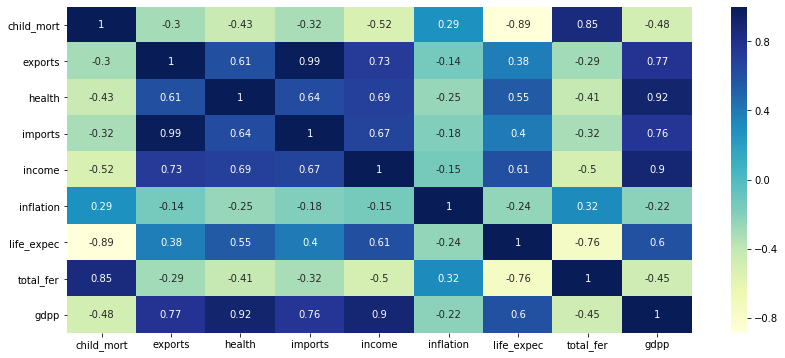

In [10]:
plt.figure(figsize = (14, 6))
sns.heatmap(country.corr(), annot = True, cmap = "YlGnBu")

**`We can see gdpp is highly correlated to imports, income, health and exports, similarly life_expec is highly correlated to total_fer, child_mor`**

### Distplot

In [11]:
def distplot(col_names):
    plt.figure(figsize=(15,18))
    for i in enumerate(col_names): 
        ax = plt.subplot(3, 3, i[0]+1)
        sns.distplot(country[i[1]], bins = 15, axlabel = i[1].upper(), color = 'red', hist_kws={ "linewidth": 3,
                               "alpha": 1, "color": "lightgreen"})
        plt.xticks(rotation = 20)
    return plt.show()

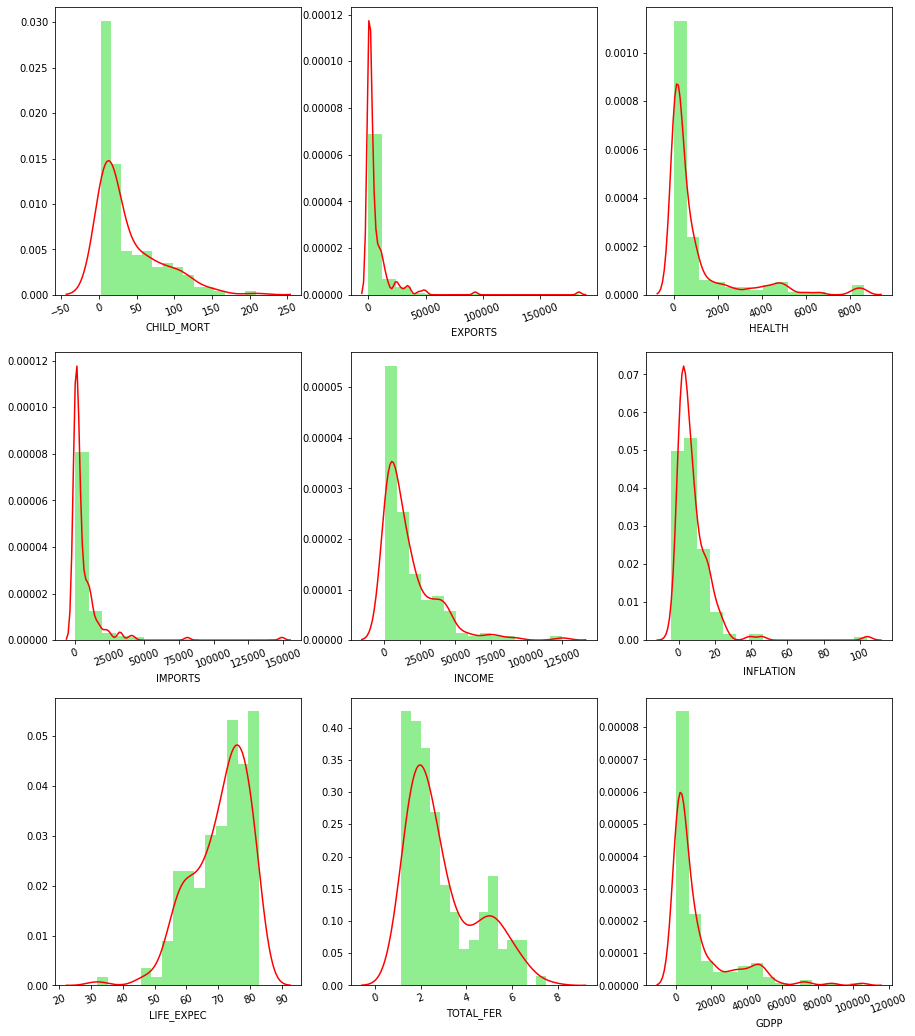

In [12]:
col_names = ['child_mort', 'exports', 'health', 'imports', 'income',
           'inflation', 'life_expec', 'total_fer', 'gdpp']

distplot(col_names)

#### Inferences - Visualizing Distribution Of Data

> As it is visible from the above figures that most of the variables are skewed. 

> It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. 

> One possible solution is to take log transformation of variables after removing outlier data points.

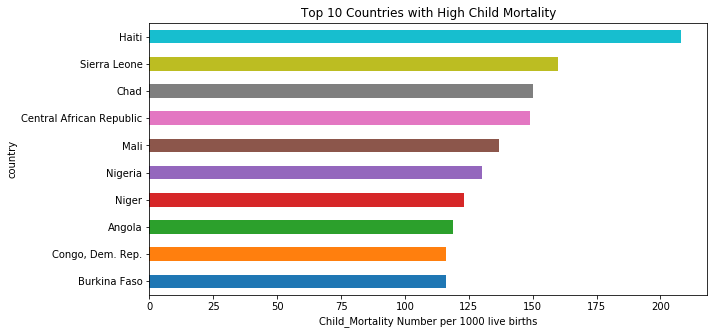

In [13]:
country.groupby('country')['child_mort'].mean().sort_values(ascending = True)[-10:].plot.barh(color=['C0','C1', 'C2','C3','C4', 'C5','C6','C7', 'C8', 'C9'], figsize = (10, 5))
plt.xlabel("Child_Mortality Number per 1000 live births")
plt.title("Top 10 Countries with High Child Mortality")
plt.show()

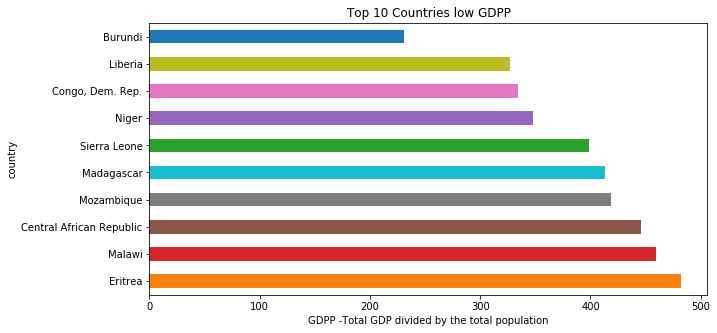

In [14]:
country.groupby('country')['gdpp'].mean().sort_values(ascending = False)[-10:].plot.barh(color=['C1','C3', 'C5','C7','C9', 'C2','C4','C6', 'C8', 'C0'], figsize = (10, 5))
plt.xlabel("GDPP -Total GDP divided by the total population")
plt.title("Top 10 Countries low GDPP")
plt.show()

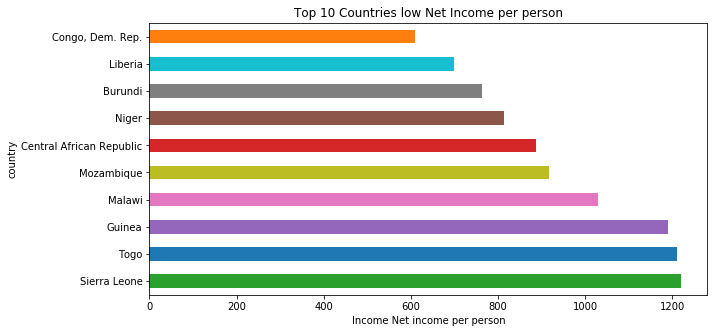

In [15]:
country.groupby('country')['income'].mean().sort_values(ascending = False)[-10:].plot.barh(color=['C2','C0', 'C4','C6','C8', 'C3','C5','C7', 'C9', 'C1'], figsize = (10, 5))
plt.xlabel("Income Net income per person")
plt.title("Top 10 Countries low Net Income per person")
plt.show()

### Boxplots

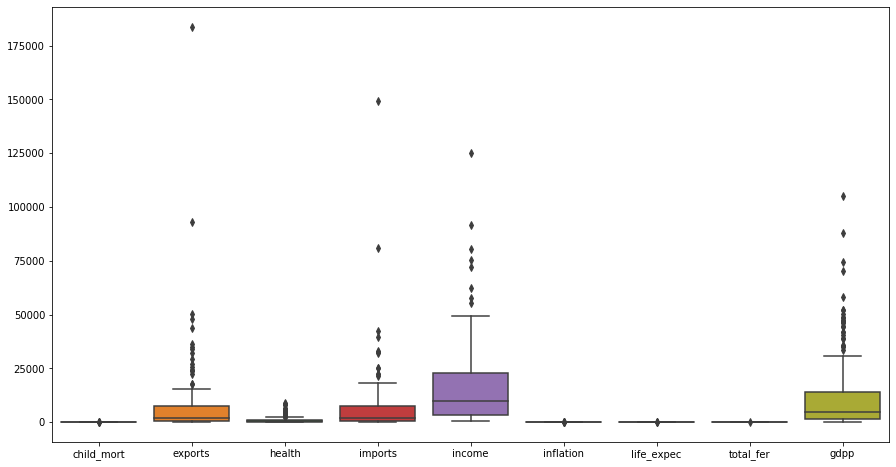

In [16]:
sns.boxplot(data=country)
fig = plt.gcf()                       #Get the current figure.If no current figure exists, a new one is created.
fig.set_size_inches(15,8)
plt.show()

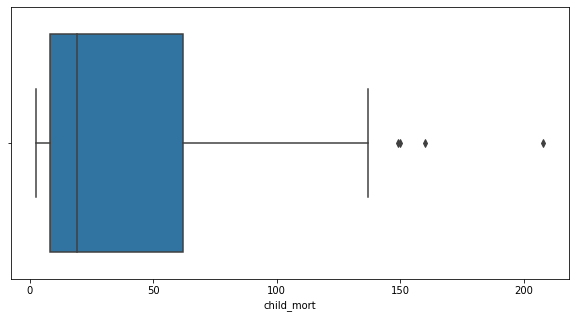

In [17]:
plt.figure(figsize = (10, 5))
sns.boxplot('child_mort', data =  country)
plt.show()

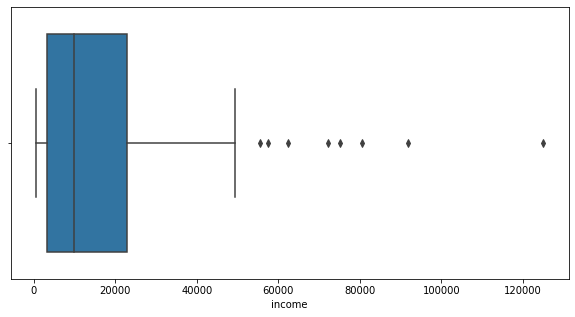

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot('income', data =  country)
plt.show()

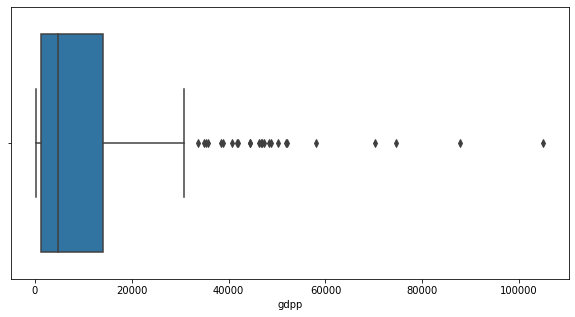

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot('gdpp', data =  country)
plt.show()

**`We can see the outliers in  the boxplots, most of them are in the higher side`**

**`Outliers in the data are to be handled for building model`**

### Outlier Treatment - Clipping Outliers

#### Since most of the outliers are on the higher side I am capping all outliers. 

#### Pandas clip 
`"""Assigns values outside boundary to boundary values. Thresholds can be singular values or array like, and in the latter case
the clipping is performed element-wise in the specified axis."""`

In [20]:
# Capping and visualizing Boxplot
def capping(col_names):
    plt.figure(figsize = (16, 16))

        
    i = 0
    for name in col_names:
        i = i + 1
        plt.subplot(3, 3, i)
    
        Q1 = country[ name].quantile(0.25)
        Q3 = country[ name].quantile(0.75)
        IQR = Q3 - Q1
    
        floor, ceil = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        country[ name] = country[ name].clip(floor, ceil)
    
        sns.boxplot(name, data =  country) 
    
    return plt.show()

col_names= ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']

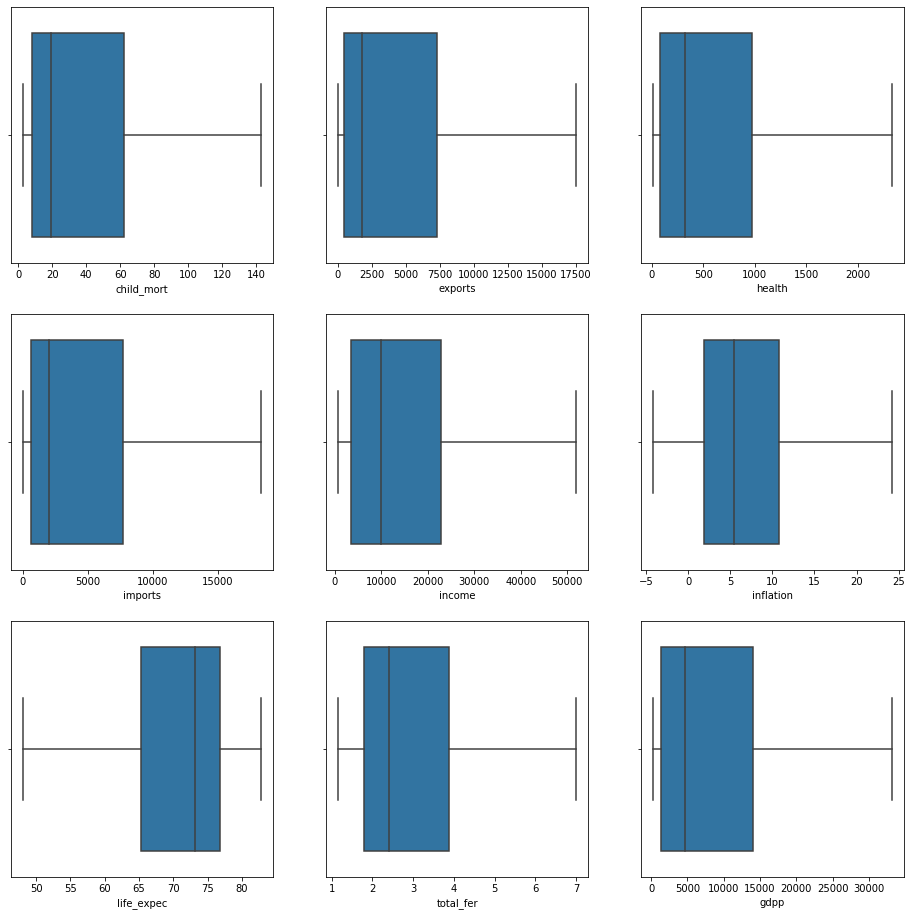

In [21]:
capping(col_names)

**`All the outliers are capped now we can proceed with EDA and model building`**

In [22]:
country.shape

(167, 10)

### Segmenting based on GDPP

>  **`Before doing clustering I am segmenting the dataset based of GDPP to see how clusters will be formed based on this segmentation, I am dividing GDPP into four segments low, lower_middle, upper_middle and high based on their values.`**

In [23]:
#Min
country['gdpp'].min()

231

In [24]:
#Max
country['gdpp'].max()

33130

In [25]:
#Median
country['gdpp'].median()

4660.0

In [26]:
# Assigning Values from quantiles

low = country['gdpp'].quantile(0.25)
lower_middle = country['gdpp'].quantile(0.5)
upper_middle = country['gdpp'].quantile(0.75)
high = country['gdpp'].quantile(1)

low, lower_middle, upper_middle, high

(1330.0, 4660.0, 14050.0, 33130.0)

In [27]:
# Segmenting to bins
gdpp_bins = [0, 1330, 4660, 14050, 33130]
gdpp_grades = ['low', 'lower_middle', 'upper_middle', 'high']

In [28]:
# Making new column in Dataframe
segments = pd.cut(country['gdpp'], gdpp_bins, labels = gdpp_grades)
country['gdpp_segments'] = segments
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_segments
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,low
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,lower_middle
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,lower_middle
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,lower_middle
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,upper_middle


### Checking Inflation

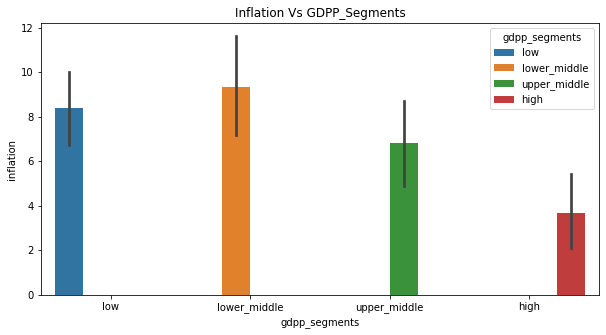

In [29]:
plt.figure(figsize = (10, 5))

hueOrder = ['low', 'lower_middle', 'upper_middle', 'high']
sns.barplot(data = country, x = 'gdpp_segments', y = 'inflation' , hue = 'gdpp_segments', hue_order = hueOrder)
plt.title("Inflation Vs GDPP_Segments")
plt.show()

**`We can see lower_middle countries have higher inflation compared to other countries`**

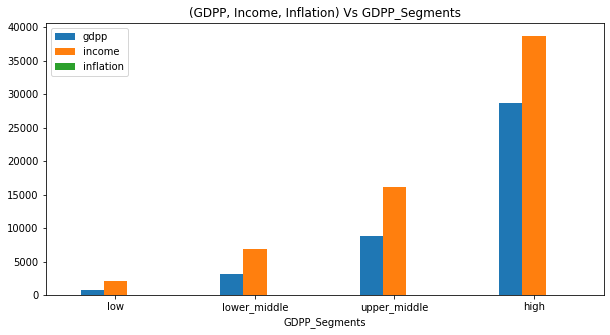

In [30]:
# Groupby Plot
country.groupby('gdpp_segments')[ 'gdpp', 'income', 'inflation'].mean().plot.bar(color=['C0', 'C1', 'C2'],  figsize = (10, 5))
plt.xlabel("GDPP_Segments")
plt.title("(GDPP, Income, Inflation) Vs GDPP_Segments")
plt.xticks(rotation = 0)
plt.show()

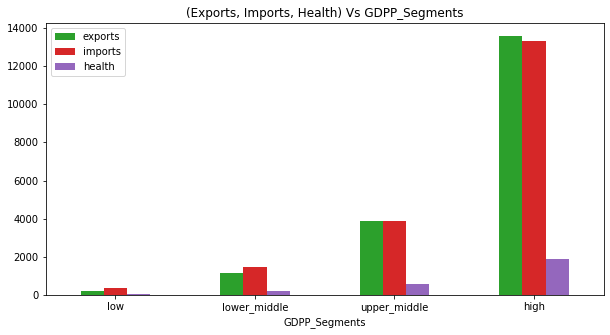

In [31]:
# Groupby Plot
country.groupby('gdpp_segments')['exports','imports',  'health'].mean().plot.bar(color=['C2', 'C3', 'C4'], figsize = (10, 5))
plt.xlabel("GDPP_Segments")
plt.title("(Exports, Imports, Health) Vs GDPP_Segments")
plt.xticks(rotation = 0)
plt.show()


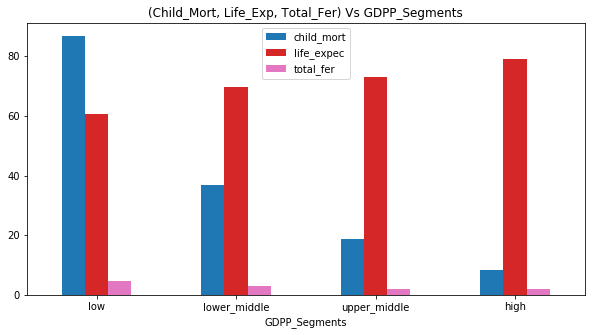

In [32]:
# Groupby plot
country.groupby('gdpp_segments')['child_mort', 'life_expec', 'total_fer'].mean().plot.bar(color=['C0', 'C3', 'C6'], figsize = (10, 5))
plt.xlabel("GDPP_Segments")
plt.title("(Child_Mort, Life_Exp, Total_Fer) Vs GDPP_Segments")
plt.xticks(rotation = 0)
plt.show()

### Pairplot

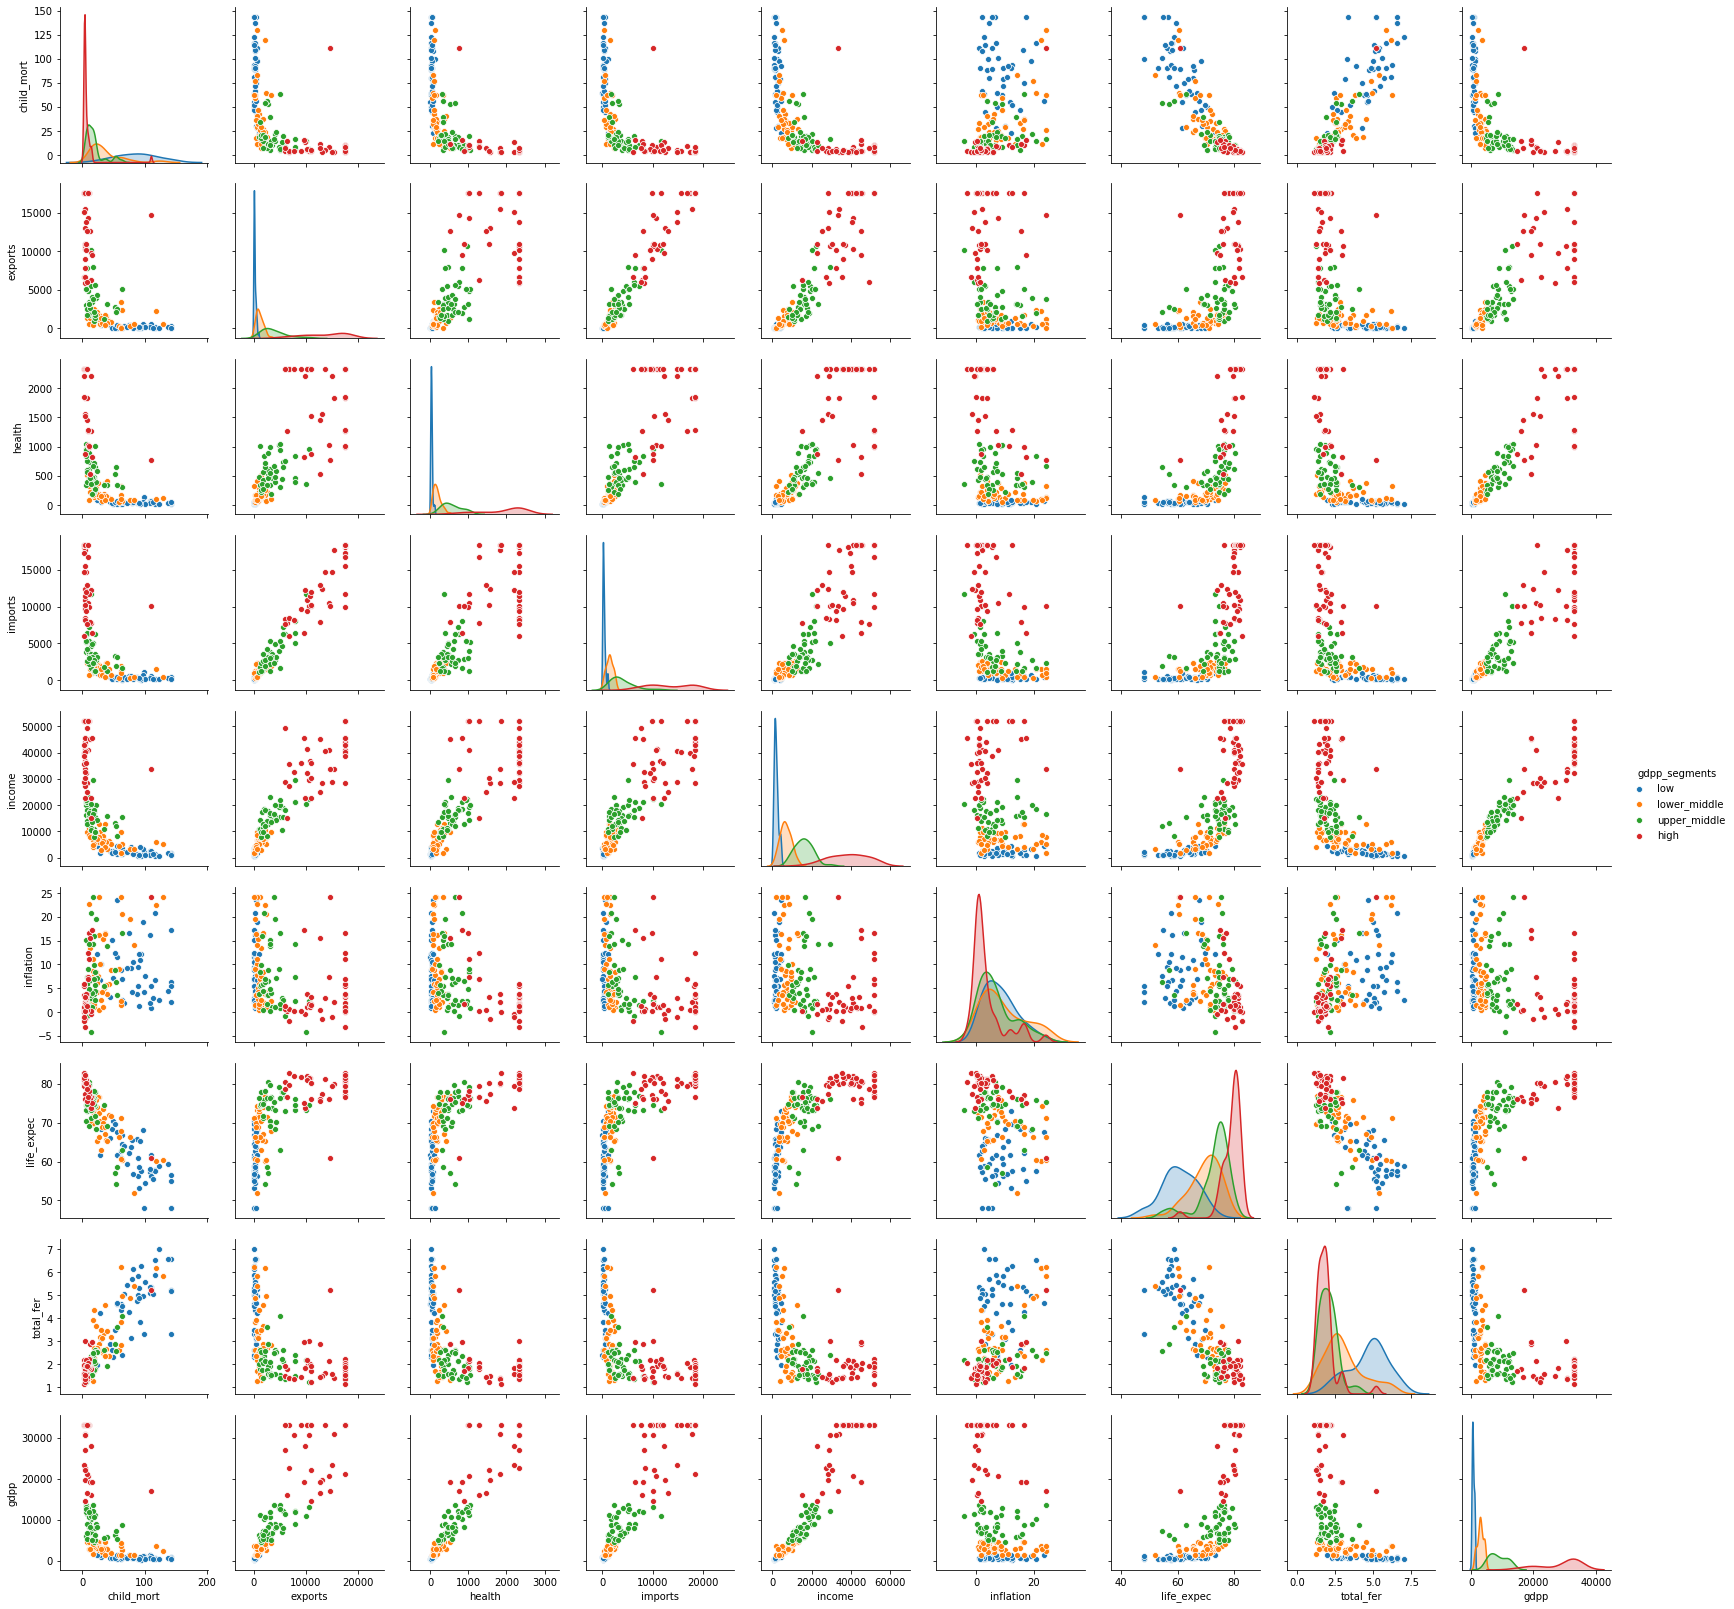

In [33]:
sns.pairplot(country, hue = 'gdpp_segments')
plt.show()

**`Looks good, clear segmetation is achieved using 4 segments, lets see how it performs in Clustering`**

### Scatter Plot - gdpp Vs others

In [34]:
def scatterplot(col_names):
    plt.figure(figsize = (16, 16))
    
    i=0
    for name in col_names:
        i = i + 1
        plt.subplot(3, 3 , i)
        sns.scatterplot(x= name, y = 'gdpp', data =  country, hue = 'gdpp_segments') 

    return plt.show()

col_names= ["child_mort", 'exports', 'health', 'imports', 
           'inflation', 'life_expec', 'total_fer', 'income']

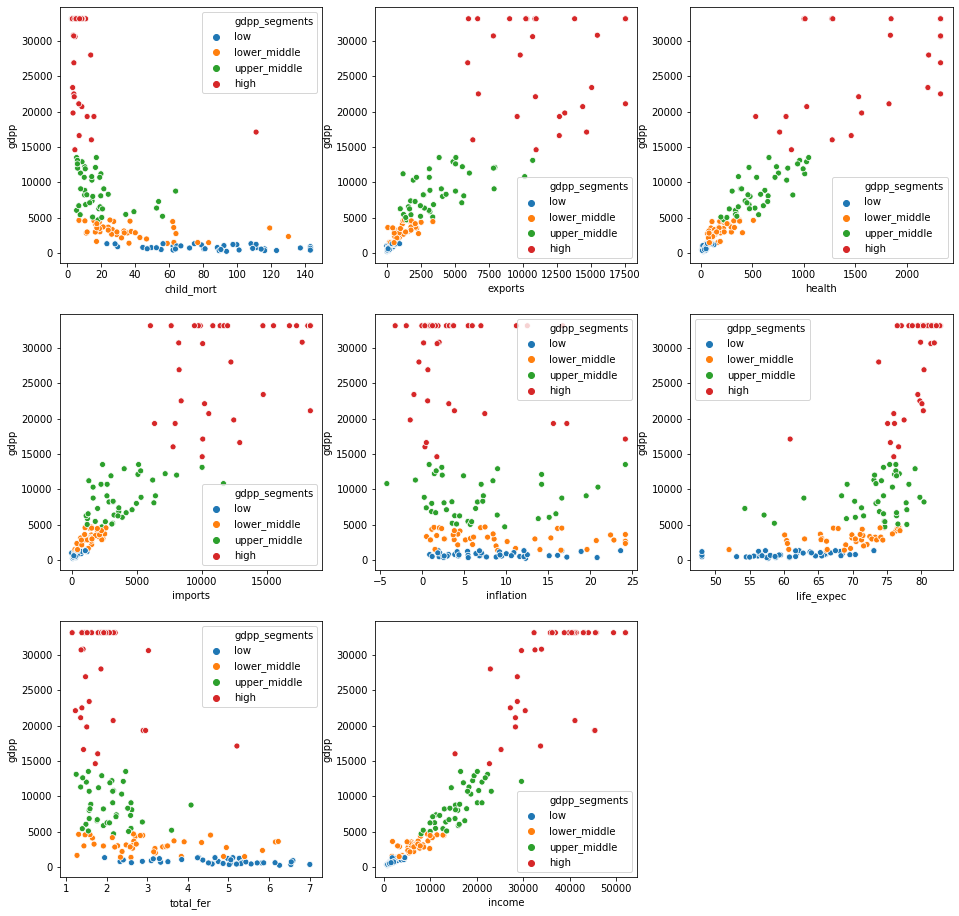

In [35]:
scatterplot(col_names)

# Section 3: Data Preparation and K Means Clustering Analysis

### Hopkins Measure

In [36]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
Hopkins_Score = round(hopkins(country.drop(['country','gdpp_segments' ], axis = 1)), 2)
print(Hopkins_Score)

0.85


**`Hopkins score looks good we now proceed with Data preparation and Clustering. If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.`**

In [38]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_segments
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,low
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,lower_middle
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,lower_middle
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,lower_middle
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,upper_middle


### Saving the Dataframe for further use

In [39]:
mydata = country.drop(['gdpp_segments'], axis = 1)
mydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200


### Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [41]:
mycountry = country.drop(['country', 'gdpp_segments'], axis =1 )

In [42]:
mycountry = standard_scaler.fit_transform(mycountry)

In [43]:
mycountry = pd.DataFrame(mycountry)
mycountry.columns = ['child_mort','exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
mycountry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795559,-0.794659,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513913,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616013,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722424,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [44]:
mycountry.shape

(167, 9)

## Clustering

### Silhouette Analysis

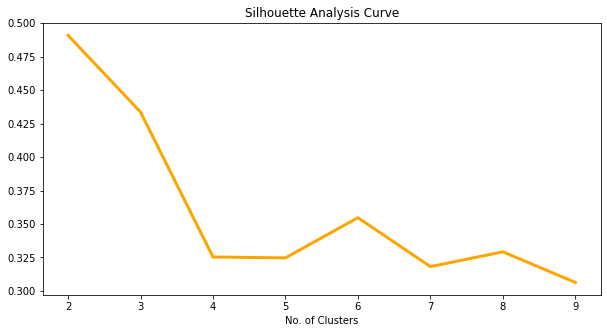

In [45]:
#First we'll do the silhouette score analysis
plt.figure(figsize = (10, 5))
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, max_iter = 50, random_state = 100).fit(mycountry)
    ss.append([k, silhouette_score(mycountry, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1], c = 'orange', linewidth = 3);
plt.title("Silhouette Analysis Curve")
plt.xlabel("No. of Clusters")
plt.show()

### By looking at the curve we are not taking 2, the optimal number of clusters is coming to be  3 as it maximises the Silhouette coefficient

### Checking Silhouette Score

In [46]:
# silhouette analysis
range_n_clusters = list(range(2, 9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 50, random_state = 100)
    kmeans.fit(mycountry)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(mycountry, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.49089694393788263
For n_clusters=3, the silhouette score is 0.43360175226115655
For n_clusters=4, the silhouette score is 0.32533073234553456
For n_clusters=5, the silhouette score is 0.32467501372632385
For n_clusters=6, the silhouette score is 0.3546866458682517
For n_clusters=7, the silhouette score is 0.31814122442693443
For n_clusters=8, the silhouette score is 0.32919446497119714


### Elbow Curve plot 

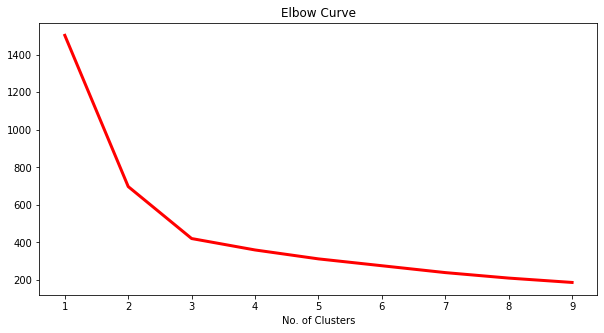

In [47]:
#Now let's proceed to the elbow curve method
plt.figure(figsize = (10, 5))
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50, random_state = 100).fit(mycountry)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1], c = 'r', linewidth = 3);
plt.title("Elbow Curve")
plt.xlabel("No. of Clusters")
plt.show()

### By looking at the curve the optimal number of clusters is coming to be 2-3

### K Means Clustering with k = 3

In [48]:
#Let's perform K means using K=3
kmean3 = KMeans(n_clusters = 3, max_iter = 50, random_state = 100)
kmean3.fit(mycountry)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [49]:
kmean3.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [50]:
# Using Saved Dataframe
mydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200


In [51]:
mydata.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [52]:
# Let's add the cluster Ids to the original data 
country_km3 = pd.concat([mydata.reset_index().drop('index', axis = 1), pd.Series(kmean3.labels_)], axis = 1)
country_km3.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'cluster_id']
country_km3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2


In [53]:
# Cross-check
country_km3.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [54]:
# Check the count of observation per cluster
country_km3['cluster_id'].value_counts()

2    78
1    48
0    41
Name: cluster_id, dtype: int64

**`Looks like good clustering has taken with k = 3`**

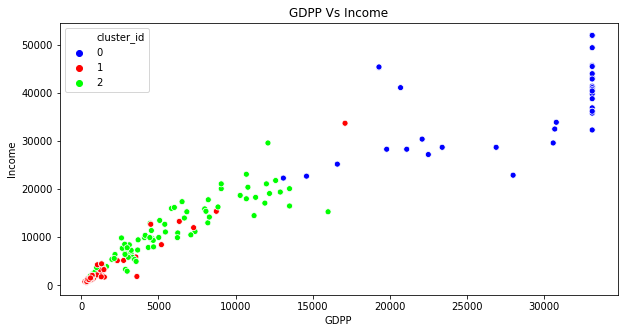

In [55]:
# Plot the Cluster with respect to the clusters obtained 
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = country_km3, palette = 'brg')
plt.title("GDPP Vs Income")
plt.xlabel("GDPP")
plt.ylabel("Income")
plt.show()

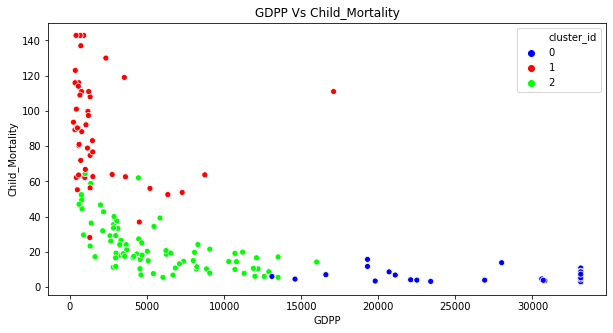

In [56]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country_km3, palette = 'brg') 
plt.title("GDPP Vs Child_Mortality")
plt.xlabel("GDPP")
plt.ylabel("Child_Mortality")
plt.show()

### Cluster Profiling

In [57]:
mydf = country_km3.drop('country', axis = 1).groupby('cluster_id')['gdpp', 'income', 'child_mort'].mean()
mydf

,gdpp,income,child_mort
cluster_id,,,
0,28969.512195,38988.780488,5.651220
1,1909.208333,3897.354167,89.620833
2,5759.897436,11196.025641,22.591026


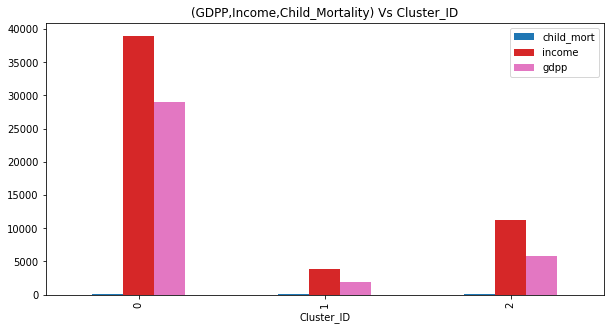

In [58]:
# Plotting [gdpp, income, child_mort] Vs cluster_id
country_km3.drop(['country',  'exports', 'health', 'imports',  'inflation', 'life_expec',
       'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar', figsize=(10,5), color=['C0', 'C3', 'C6'])
plt.title("(GDPP,Income,Child_Mortality) Vs Cluster_ID")
plt.xlabel("Cluster_ID")
plt.show()

**`We can see Cluster 1 has lower GDPP, Income as compared to other clusters and higher Child_Mortality Rate`**

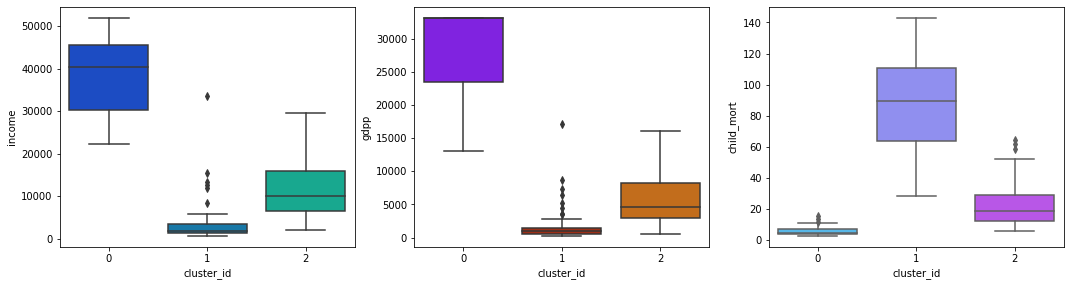

In [59]:
# boxplots
plt.figure(figsize = (18, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='cluster_id', y='income', data = country_km3,  palette="winter")
plt.subplot(3, 3, 2)
sns.boxplot(x='cluster_id', y='gdpp', data = country_km3,  palette="gnuplot")
plt.subplot(3, 3, 3)
sns.boxplot(x='cluster_id', y='child_mort', data = country_km3,  palette="cool")
plt.show()

### Finding Country Names that belong to cluster  1

In [60]:
#Let's use the concept of binning
country_km3[country_km3['cluster_id'] == 1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

### Top 10 Countries which require immediate aid

In [61]:
# Groupby cluster_id
country_km3[country_km3['cluster_id'] == 1].sort_values(by=[ 'gdpp','income', "child_mort" ], ascending=[True,True, False])[:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.600,20.61,26.80,90.55,764.0,12.30,57.70,6.2600,231,1
88,Liberia,89.300,62.46,38.59,302.80,700.0,5.47,60.80,5.0200,327,1
37,"Congo, Dem. Rep.",116.000,137.27,26.42,165.66,609.0,20.80,57.50,6.5400,334,1
112,Niger,123.000,77.26,17.96,170.87,814.0,2.55,58.80,7.0075,348,1
132,Sierra Leone,142.875,67.03,52.27,137.66,1220.0,17.20,55.00,5.2000,399,1
93,Madagascar,62.200,103.25,15.57,177.59,1390.0,8.79,60.80,4.6000,413,1
106,Mozambique,101.000,131.99,21.83,193.58,918.0,7.64,54.50,5.5600,419,1
31,Central African Republic,142.875,52.63,17.75,118.19,888.0,2.01,48.05,5.2100,446,1
94,Malawi,90.500,104.65,30.25,160.19,1030.0,12.10,53.10,5.3100,459,1
50,Eritrea,55.200,23.09,12.82,112.31,1420.0,11.60,61.70,4.6100,482,1


### Comparing with gdpp_segment dataframe

In [62]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_segments
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,low
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,lower_middle
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,lower_middle
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,lower_middle
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,upper_middle


In [63]:
#Grouping by GDPP Segments
country[country['gdpp_segments'] == 'low'].sort_values(by=['gdpp', 'income',  "child_mort"], ascending=[True,True,False])[:10] 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_segments
26,Burundi,93.600,20.61,26.80,90.55,764.0,12.30,57.70,6.2600,231,low
88,Liberia,89.300,62.46,38.59,302.80,700.0,5.47,60.80,5.0200,327,low
37,"Congo, Dem. Rep.",116.000,137.27,26.42,165.66,609.0,20.80,57.50,6.5400,334,low
112,Niger,123.000,77.26,17.96,170.87,814.0,2.55,58.80,7.0075,348,low
132,Sierra Leone,142.875,67.03,52.27,137.66,1220.0,17.20,55.00,5.2000,399,low
93,Madagascar,62.200,103.25,15.57,177.59,1390.0,8.79,60.80,4.6000,413,low
106,Mozambique,101.000,131.99,21.83,193.58,918.0,7.64,54.50,5.5600,419,low
31,Central African Republic,142.875,52.63,17.75,118.19,888.0,2.01,48.05,5.2100,446,low
94,Malawi,90.500,104.65,30.25,160.19,1030.0,12.10,53.10,5.3100,459,low
50,Eritrea,55.200,23.09,12.82,112.31,1420.0,11.60,61.70,4.6100,482,low


### Both are showing the same 10 countries, so K means has done good Clustering with the dataset

**`So we can see after clustering there no change in top 10 countries that require aid, in the original dataset we assumed 4 clusters, in k means we took 3 clusters.`**

### K Means Clustering with k = 4

In [64]:
mycountry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795559,-0.794659,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513913,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616013,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722424,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [65]:
#Let's perform K means using K=4
kmean4 = KMeans(n_clusters = 4, max_iter = 50, random_state = 100)
kmean4.fit(mycountry)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [66]:
kmean4.labels_

array([2, 0, 0, 2, 3, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 2, 0, 0, 3, 0,
       3, 1, 3, 2, 2, 0, 2, 1, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 2, 3, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 2, 2, 0, 1, 2, 1, 3, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 2,
       2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1, 3, 0, 2, 0, 3, 2, 3, 3,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 3, 2, 2, 0, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 0, 0, 0, 0, 2, 2])

In [67]:
# Using Saved Dataframe
mydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200


In [68]:
# Let's add the cluster Ids to the original data 
country_km4 = pd.concat([mydata.reset_index().drop('index', axis = 1), pd.Series(kmean4.labels_)], axis = 1)
country_km4.columns = ['country', 'child_mort','exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp',  'cluster_id']
country_km4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,3


In [69]:
# Cross-check
country_km4.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [70]:
# Check the count of observation per cluster
country_km4['cluster_id'].value_counts()

0    56
2    44
1    37
3    30
Name: cluster_id, dtype: int64

**`Much better Clustering is done for the dataset with k = 4`**

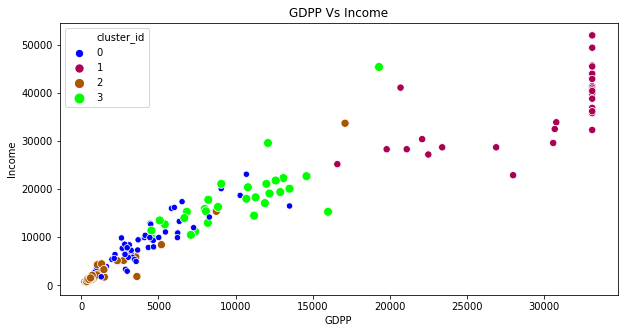

In [71]:
# Plot the Cluster with respect to the clusters obtained 
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = country_km4, palette= 'brg',size = 'cluster_id', sizes = (40, 80))
plt.title("GDPP Vs Income")
plt.xlabel("GDPP")
plt.ylabel("Income")
plt.show()

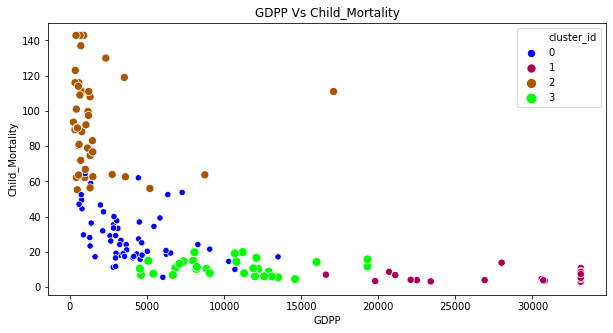

In [72]:
# Plot the Cluster with respect to the clusters obtained 
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country_km4, palette= 'brg',size = 'cluster_id', sizes = (40, 80))
plt.title("GDPP Vs Child_Mortality")
plt.xlabel("GDPP")
plt.ylabel("Child_Mortality")
plt.show()

### Cluster Profiling

In [73]:
#Grouping by cluster_id
country_km4.drop('country', axis = 1).groupby('cluster_id')['gdpp', 'income',  "child_mort"].mean()

,gdpp,income,child_mort
cluster_id,,,
0,3989.678571,8581.250000,29.185714
1,30309.459459,39536.216216,5.237838
2,1641.409091,3347.568182,93.877273
3,10385.666667,18940.666667,11.226667


<Figure size 720x360 with 0 Axes>

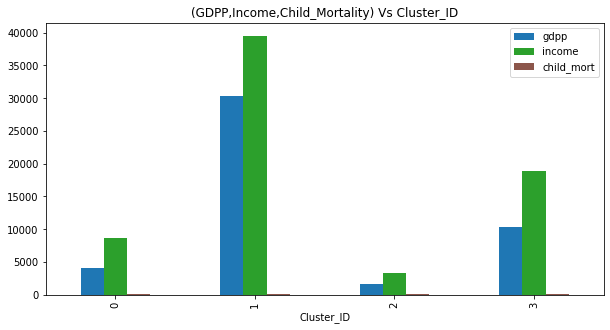

In [74]:
plt.figure(figsize = (10, 5))
country_km4.groupby('cluster_id')['gdpp', 'income',  "child_mort"].mean().plot(kind = 'bar', figsize=(10,5),color=['C0', 'C2', 'C5'])
plt.title("(GDPP,Income,Child_Mortality) Vs Cluster_ID")
plt.xlabel("Cluster_ID")
plt.show()

**`We can see Cluster 2 has lower GDPP, Income as compared to other clusters and higher Child_Mortality Rate`**

In [75]:
#Cluster profiling
country_km4[country_km4['cluster_id'] == 2].sort_values(by=['gdpp', 'income',  "child_mort"], ascending=[True,True, False])[:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.600,20.61,26.80,90.55,764.0,12.30,57.70,6.2600,231,2
88,Liberia,89.300,62.46,38.59,302.80,700.0,5.47,60.80,5.0200,327,2
37,"Congo, Dem. Rep.",116.000,137.27,26.42,165.66,609.0,20.80,57.50,6.5400,334,2
112,Niger,123.000,77.26,17.96,170.87,814.0,2.55,58.80,7.0075,348,2
132,Sierra Leone,142.875,67.03,52.27,137.66,1220.0,17.20,55.00,5.2000,399,2
93,Madagascar,62.200,103.25,15.57,177.59,1390.0,8.79,60.80,4.6000,413,2
106,Mozambique,101.000,131.99,21.83,193.58,918.0,7.64,54.50,5.5600,419,2
31,Central African Republic,142.875,52.63,17.75,118.19,888.0,2.01,48.05,5.2100,446,2
94,Malawi,90.500,104.65,30.25,160.19,1030.0,12.10,53.10,5.3100,459,2
50,Eritrea,55.200,23.09,12.82,112.31,1420.0,11.60,61.70,4.6100,482,2


### Comparing with gdpp_segment dataframe

In [76]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_segments
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,low
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,lower_middle
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,lower_middle
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,lower_middle
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,upper_middle


In [77]:
country[country['gdpp_segments'] == 'low'].sort_values(by=['gdpp', 'income',  "child_mort"], ascending=[True,True, False])[:10] 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp_segments
26,Burundi,93.600,20.61,26.80,90.55,764.0,12.30,57.70,6.2600,231,low
88,Liberia,89.300,62.46,38.59,302.80,700.0,5.47,60.80,5.0200,327,low
37,"Congo, Dem. Rep.",116.000,137.27,26.42,165.66,609.0,20.80,57.50,6.5400,334,low
112,Niger,123.000,77.26,17.96,170.87,814.0,2.55,58.80,7.0075,348,low
132,Sierra Leone,142.875,67.03,52.27,137.66,1220.0,17.20,55.00,5.2000,399,low
93,Madagascar,62.200,103.25,15.57,177.59,1390.0,8.79,60.80,4.6000,413,low
106,Mozambique,101.000,131.99,21.83,193.58,918.0,7.64,54.50,5.5600,419,low
31,Central African Republic,142.875,52.63,17.75,118.19,888.0,2.01,48.05,5.2100,446,low
94,Malawi,90.500,104.65,30.25,160.19,1030.0,12.10,53.10,5.3100,459,low
50,Eritrea,55.200,23.09,12.82,112.31,1420.0,11.60,61.70,4.6100,482,low


### It can be seen that for k = 4 the top 10 Countries are the same 

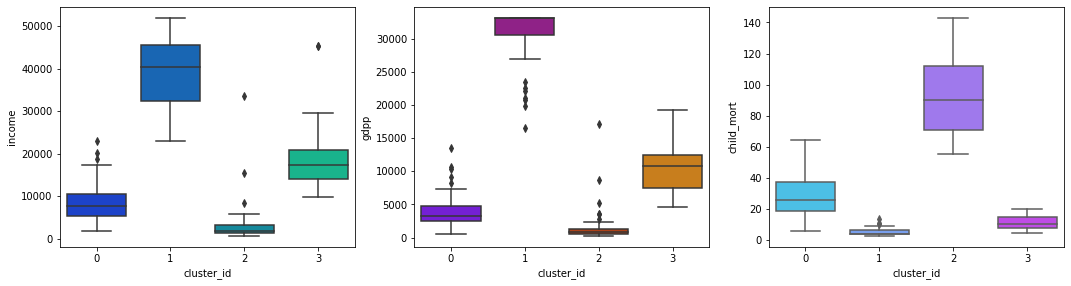

In [78]:
# boxplots
plt.figure(figsize = (18, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='cluster_id', y='income', data = country_km4,  palette="winter")
plt.subplot(3, 3, 2)
sns.boxplot(x='cluster_id', y='gdpp', data = country_km4,  palette="gnuplot")
plt.subplot(3, 3, 3)
sns.boxplot(x='cluster_id', y='child_mort', data = country_km4,  palette="cool")
plt.show()

**`From boxplots it can be easily seen that cluster id 2 has low gdpp and income and high child_mortality`**

### Selecting Final 10 Countries

In [79]:
final_countries = country_km4[country_km4['cluster_id'] == 2].sort_values(by=['gdpp', 'income',  "child_mort"], ascending=[True,True, False])[:10]

In [80]:
# Ten countries that need urgent aid are

aid = list(final_countries['country'])
print(aid)

['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi', 'Eritrea']


In [81]:
Aid_Countries = pd.DataFrame({"Country_Name": aid}, index = range(1, 11))
Aid_Countries

,Country_Name
1,Burundi
2,Liberia
3,"Congo, Dem. Rep."
4,Niger
5,Sierra Leone
6,Madagascar
7,Mozambique
8,Central African Republic
9,Malawi
10,Eritrea


# Section 4: Hierarchical Clustering

In [82]:
mycountry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795559,-0.794659,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513913,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616013,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722424,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [83]:
#Making a copy for Hierarchical Clustering
country_HC = country_km4.copy()
country_HC.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,3


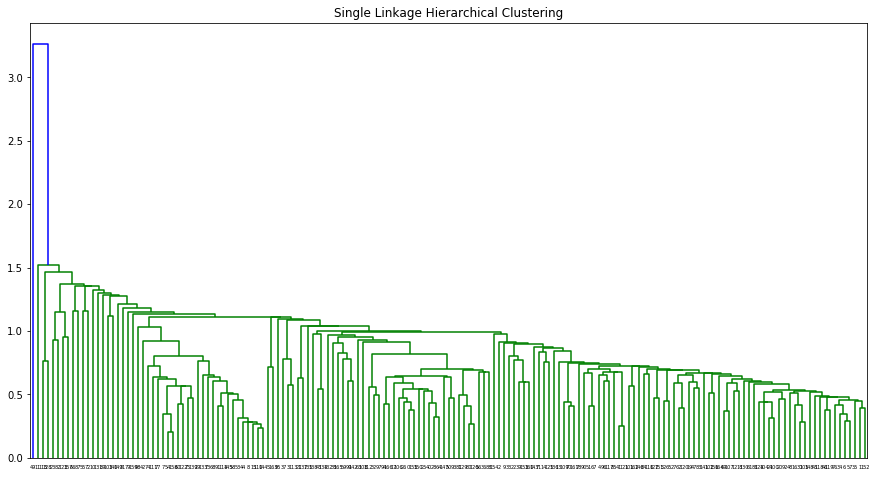

In [84]:
# single linkage
plt.figure(figsize = (15, 8))
mergings = linkage(mycountry, method = "single", metric = 'euclidean')
dendrogram(mergings)
plt.title("Single Linkage Hierarchical Clustering")
plt.xticks(rotation = 0)
plt.show()

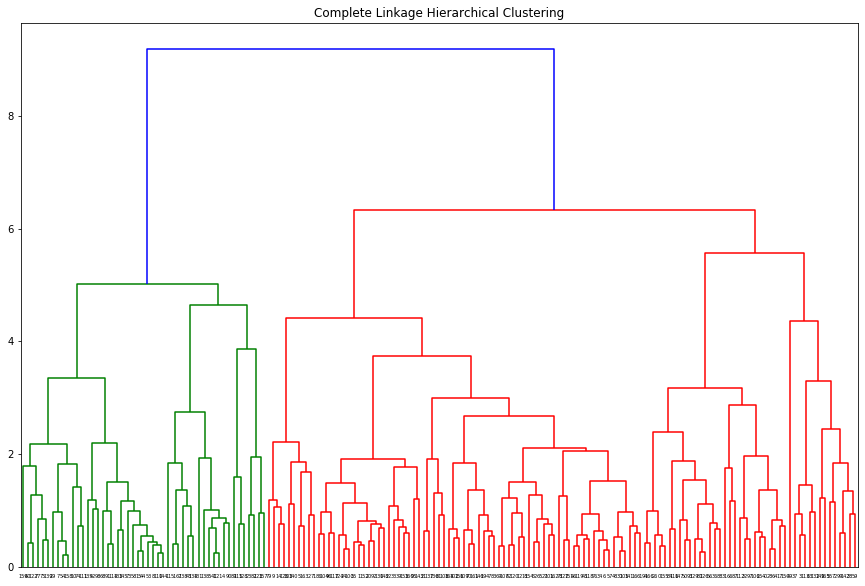

In [85]:
# complete linkage

plt.figure(figsize = (15, 10))
mergings = linkage(mycountry, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title("Complete Linkage Hierarchical Clustering")
plt.xticks(rotation = 0)
plt.show()

### **`From this plot the optimal clusters is 3 or 4`**

### Checking for 4 Clusters

In [86]:
# 4 clusters
cluster_labels4 = cut_tree(mergings, n_clusters = 4).reshape(-1, )
cluster_labels4

array([0, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 3, 3, 3,
       3, 1, 1, 1, 1, 2, 0, 3, 1, 3, 3, 2, 0, 1, 3, 2, 3, 1, 1, 2, 0, 1,
       0, 3, 3, 1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 0, 1, 3, 1, 0, 3, 1, 0,
       0, 3, 3, 3, 1, 0, 0, 1, 1, 0, 3, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 3, 0, 2, 3, 3, 0, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0, 1, 3, 0, 1, 3,
       2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3, 3, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 0])

In [87]:
# assign cluster labels
country_HC['cluster_labels4'] = cluster_labels4
country_HC.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels4
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,2,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,3,3


In [88]:
country_HC['cluster_labels4'].value_counts()

1    75
3    49
0    29
2    14
Name: cluster_labels4, dtype: int64

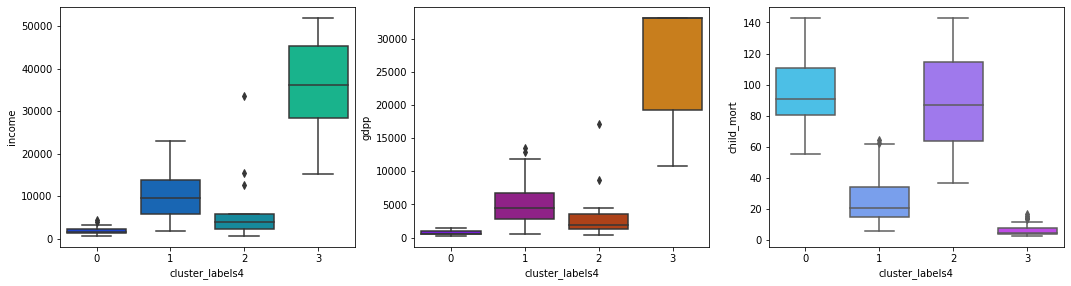

In [89]:
# boxplots
plt.figure(figsize = (18, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='cluster_labels4', y='income', data = country_HC,  palette="winter")
plt.subplot(3, 3, 2)
sns.boxplot(x='cluster_labels4', y='gdpp', data = country_HC,  palette="gnuplot")
plt.subplot(3, 3, 3)
sns.boxplot(x='cluster_labels4', y='child_mort', data = country_HC,  palette="cool")
plt.show()

**`We can see cluster 0 has low gdpp and income and high child mortality compared to other clusters`**

### Cluster Profiling

In [90]:
country_HC.drop('country', axis = 1).groupby('cluster_labels4')['gdpp', 'income',  "child_mort"].mean()

,gdpp,income,child_mort
cluster_labels4,,,
0,717.620690,1816.000000,96.162931
1,4938.293333,9931.466667,25.789333
2,3516.500000,6938.500000,90.005357
3,26290.816327,36004.897959,6.379592


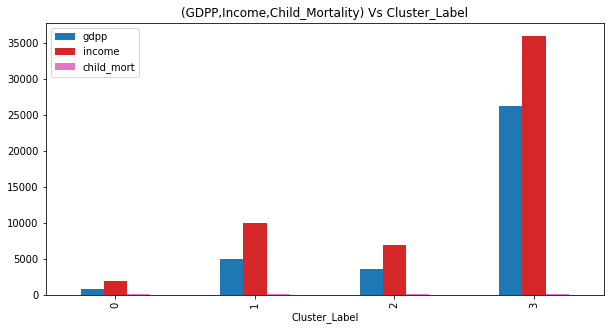

In [91]:
country_HC.groupby('cluster_labels4')['gdpp', 'income',  "child_mort"].mean().plot(kind = 'bar', figsize=(10,5), color=['C0', 'C3', 'C6'])
plt.title("(GDPP,Income,Child_Mortality) Vs Cluster_Label")
plt.xlabel("Cluster_Label")
plt.show()

**`We can see Cluster 0 has lower GDPP, Income as compared to other clusters and higher Child_Mortality Rate`**

In [92]:
country_HC[country_HC['cluster_labels4'] == 0].sort_values(by=['gdpp', 'income',  "child_mort"], ascending=[True,True, False])[:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels4
26,Burundi,93.600,20.61,26.80,90.55,764.0,12.30,57.70,6.2600,231,2,0
88,Liberia,89.300,62.46,38.59,302.80,700.0,5.47,60.80,5.0200,327,2,0
112,Niger,123.000,77.26,17.96,170.87,814.0,2.55,58.80,7.0075,348,2,0
93,Madagascar,62.200,103.25,15.57,177.59,1390.0,8.79,60.80,4.6000,413,2,0
106,Mozambique,101.000,131.99,21.83,193.58,918.0,7.64,54.50,5.5600,419,2,0
31,Central African Republic,142.875,52.63,17.75,118.19,888.0,2.01,48.05,5.2100,446,2,0
94,Malawi,90.500,104.65,30.25,160.19,1030.0,12.10,53.10,5.3100,459,2,0
50,Eritrea,55.200,23.09,12.82,112.31,1420.0,11.60,61.70,4.6100,482,2,0
150,Togo,90.300,196.18,37.33,279.62,1210.0,1.18,58.70,4.8700,488,2,0
64,Guinea-Bissau,114.000,81.50,46.50,192.54,1390.0,2.97,55.60,5.0500,547,2,0


**`There is small changes in country names when we compare it with K Means list and `**

### Checking for 3 Clusters

In [93]:
# 3 clusters
cluster_labels3 = cut_tree(mergings, n_clusters = 3).reshape(-1, )
cluster_labels3

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [94]:
# assign cluster labels
country_HC['cluster_labels3'] = cluster_labels3
country_HC.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels4,cluster_labels3
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0,1,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0,1,1
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,2,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,3,3,2


In [95]:
country_HC['cluster_labels3'].value_counts()

1    75
2    49
0    43
Name: cluster_labels3, dtype: int64

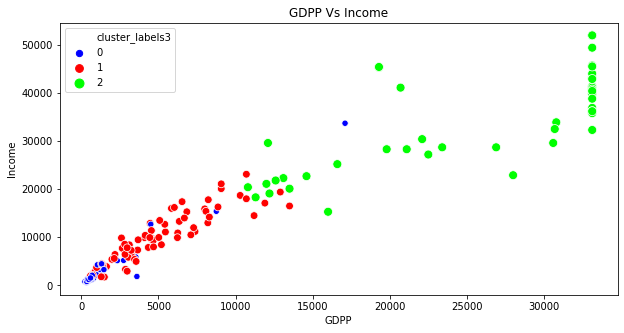

In [96]:
# Plot the Cluster with respect to the clusters obtained 
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_labels3', legend = 'full', data = country_HC, palette= 'brg',size = 'cluster_labels3', sizes = (40, 80))
plt.title("GDPP Vs Income")
plt.xlabel("GDPP")
plt.ylabel("Income")
plt.show()

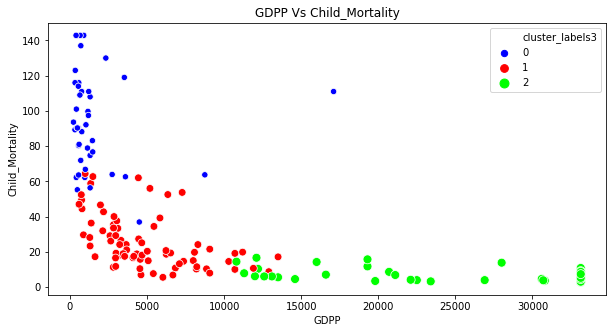

In [97]:
# Plot the Cluster with respect to the clusters obtained 
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels3', legend = 'full', data = country_HC, palette= 'brg',size = 'cluster_labels3', sizes = (40, 80))
plt.title("GDPP Vs Child_Mortality")
plt.xlabel("GDPP")
plt.ylabel("Child_Mortality")
plt.show()

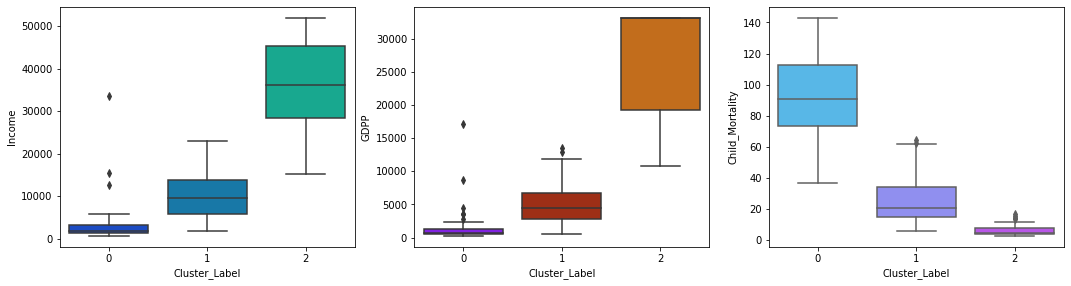

In [98]:
# boxplots
plt.figure(figsize = (18, 15))

plt.subplot(3, 3, 1)
sns.boxplot(x='cluster_labels3', y='income', data = country_HC,  palette="winter")
plt.xlabel("Cluster_Label")
plt.ylabel("Income")
plt.subplot(3, 3, 2)
sns.boxplot(x='cluster_labels3', y='gdpp', data = country_HC,  palette="gnuplot")
plt.xlabel("Cluster_Label")
plt.ylabel("GDPP")
plt.subplot(3, 3, 3)
sns.boxplot(x='cluster_labels3', y='child_mort', data = country_HC,  palette="cool")
plt.xlabel("Cluster_Label")
plt.ylabel("Child_Mortality")
plt.show()


In [99]:
#Groupby cluster_Label3
country_HC.drop('country', axis = 1).groupby('cluster_labels3')['gdpp', 'income',  "child_mort"].mean()

,gdpp,income,child_mort
cluster_labels3,,,
0,1628.883721,3483.790698,94.158140
1,4938.293333,9931.466667,25.789333
2,26290.816327,36004.897959,6.379592


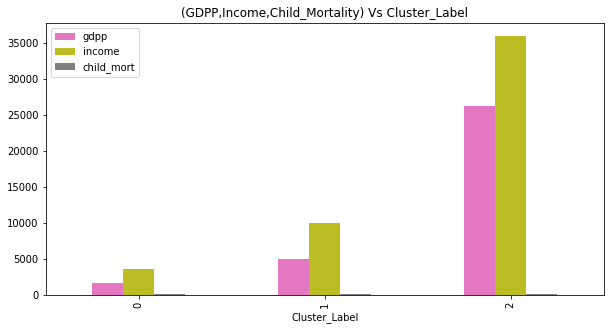

In [100]:
country_HC.groupby('cluster_labels3')['gdpp', 'income',  "child_mort"].mean().plot(kind = 'bar', figsize=(10,5), color=['C6', 'C8', 'C7'])
plt.title("(GDPP,Income,Child_Mortality) Vs Cluster_Label")
plt.xlabel("Cluster_Label")
plt.show()

In [101]:
country_HC[country_HC['cluster_labels3'] == 0].sort_values(by=['gdpp', 'income',  "child_mort"], ascending=[True,True, False])[:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels4,cluster_labels3
26,Burundi,93.600,20.61,26.80,90.55,764.0,12.30,57.70,6.2600,231,2,0,0
88,Liberia,89.300,62.46,38.59,302.80,700.0,5.47,60.80,5.0200,327,2,0,0
37,"Congo, Dem. Rep.",116.000,137.27,26.42,165.66,609.0,20.80,57.50,6.5400,334,2,2,0
112,Niger,123.000,77.26,17.96,170.87,814.0,2.55,58.80,7.0075,348,2,0,0
132,Sierra Leone,142.875,67.03,52.27,137.66,1220.0,17.20,55.00,5.2000,399,2,2,0
93,Madagascar,62.200,103.25,15.57,177.59,1390.0,8.79,60.80,4.6000,413,2,0,0
106,Mozambique,101.000,131.99,21.83,193.58,918.0,7.64,54.50,5.5600,419,2,0,0
31,Central African Republic,142.875,52.63,17.75,118.19,888.0,2.01,48.05,5.2100,446,2,0,0
94,Malawi,90.500,104.65,30.25,160.19,1030.0,12.10,53.10,5.3100,459,2,0,0
50,Eritrea,55.200,23.09,12.82,112.31,1420.0,11.60,61.70,4.6100,482,2,0,0


### When comparing with KMeans, Hierarchical Clustering and Segmented-clusters we get the same 10 countries. So k = 3 is good for both Clustering

# Top 10 Countries which require immediate Monetary Aid

In [102]:
list(aid)

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']

### For KMeans k = 3 is selected, similar results are obtained for Hierarchical Clustering when k = 3.
### Elbow curve shows k = 3 and from Dendrogram we can find max distance is obtained when k = 3

**`Thank you`** 